In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Analyze the Distribution of SegNet Gradient Scales
===

In [3]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import spline
import seaborn as sns

In [4]:
# setup font size
matplotlib.rcParams.update({'font.size': 16})

In [69]:
def plot_scales(ax, train_dir, iters):
    df = pd.read_csv(os.path.join(train_dir, 'loss_scale.csv'), index_col=0)
    
    # only plot final scales
    df = df[(df['key'] == 'final')]
    width = 0.3
    
    for i, iter_ in enumerate(iters):
        scales = df[df['iter'] == iter_]['val'].values
        scales = scales[::-1]
        ax.bar(np.arange(len(scales)) + width * (i - 1),
               np.log2(scales),
               width=width,
               edgecolor='k',
               label='iter={}'.format(iter_))
    
    ax.axhline(0, linewidth=0.8, color='k')
    ax.legend()
    ax.set_xlabel('Layer ID')
    ax.set_ylabel('Log2(scale)')
    ax.set_title('Gradient Scales in SegNet')

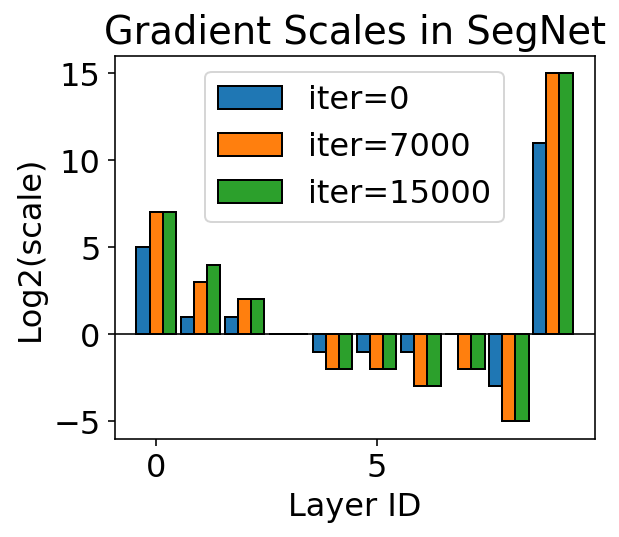

In [80]:
fig, ax = plt.subplots(figsize=(4.5, 4))

train_dir = '/mnt/ccnas2/bdp/rz3515/train/ada_loss/segmentation/segnet/ada_loss.F_100_AB_65504_SB_65504_UF_1e-3.20200120_2'
iters = [0, 7000, 15000]

plot_scales(ax, train_dir, iters)

fig.tight_layout()
fig.savefig('SegNet_Scales.pdf')